In [1]:
import pandas as pd
import seaborn as sns

In [2]:
encuesta=pd.read_csv("encuestalimpia.csv")

In [3]:
encuesta.head()

,P22,P2002,P3,P2,P1304,P2004,P28,P803,P1303,P27,...,CCAA,P14R,P26,P4,P804,P19,TAMUNI,P1302,ESTUDIOS,P2003
0,1,4,-4,-2,0,6,1,-4,1,1,...,16,2,2,3,-4,4,5,3,6,3
1,2,4,-3,-3,3,6,1,-5,1,1,...,16,1,1,3,-3,6,5,2,2,1
2,2,4,-3,-3,0,6,1,-3,4,2,...,16,3,5,3,-5,4,5,5,5,3
3,1,4,-3,-1,0,6,1,-4,0,1,...,16,2,4,3,-4,4,5,10,6,2
4,1,4,-3,-3,0,7,1,-3,2,2,...,16,12,5,3,-5,2,5,2,6,2


In [4]:
def drop_file(data,pregunta,valor):
    data = data[data[pregunta] != valor]
    return data

In [5]:
#elimino los valores ns y nc
encuesta = drop_file(encuesta,"P19",98)
encuesta = drop_file(encuesta,"P19",99)

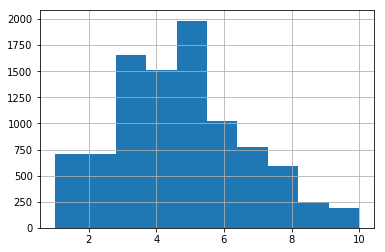

In [6]:
#verifico la distribucción de los datos
encuesta.P19.hist()

In [7]:
encuesta.P19.describe()

count    9395.000000
mean        4.632890
std         2.131429
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: P19, dtype: float64

In [8]:
#categorizo la pregunta de P19=autoubicación ideológica, se ha incluido el valor 7 en derecha, haciendo
#que este grupa tenga un elemento mas pero con esto se intenta compensar el numero menor de personas que han
#señalado mas de 6
etiquetas=[0,1,2]
cortes = [0,3,6,10]
encuesta["ideologia"] = pd.cut(encuesta['P19'],cortes, labels=etiquetas)
encuesta["ideologia"] = pd.to_numeric(encuesta["ideologia"])

In [9]:
#verificamos que se ha realizado bien la categorización y que los componentes están bien distribuidos,
#aunque como se ha indicado antes el grupo de "derecha", aún teniendo un elemento mas es la menos representada
bla= pd.crosstab(encuesta.ideologia, encuesta.P19)
bla["total"]=bla.T.sum()
bla

P19,1,2,3,4,5,6,7,8,9,10,total
ideologia,,,,,,,,,,,
0,704,705,1655,0,0,0,0,0,0,0,3064
1,0,0,0,1513,1984,1024,0,0,0,0,4521
2,0,0,0,0,0,0,776,596,249,189,1810


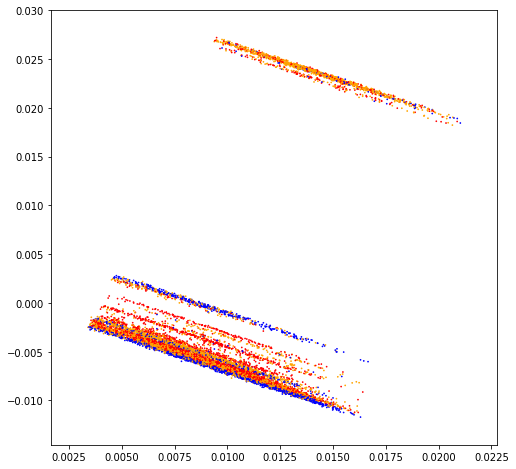

In [10]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
distribution_all=pca.fit(encuesta.T) 
plt.figure(figsize=(8,8))
color= ['red' if ideologia == 0 
        else 'orange' if ideologia == 1
        else 'blue' if ideologia == 2
        else 'red' for ideologia in list(encuesta['ideologia'])]
plt.scatter(distribution_all.components_[0], distribution_all.components_[1],color=color,s=0.5)

In [11]:
col_names= encuesta.columns
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9730
Data columns (total 30 columns):
P22          9395 non-null int64
P2002        9395 non-null int64
P3           9395 non-null int64
P2           9395 non-null int64
P1304        9395 non-null int64
P2004        9395 non-null int64
P28          9395 non-null int64
P803         9395 non-null int64
P1303        9395 non-null int64
P27          9395 non-null int64
P1301        9395 non-null int64
P25          9395 non-null int64
P23          9395 non-null int64
P802         9395 non-null int64
P0A          9395 non-null int64
P2001        9395 non-null int64
P801         9395 non-null int64
P1           9395 non-null int64
CAPITAL      9395 non-null int64
CCAA         9395 non-null int64
P14R         9395 non-null int64
P26          9395 non-null int64
P4           9395 non-null int64
P804         9395 non-null int64
P19          9395 non-null int64
TAMUNI       9395 non-null int64
P1302        9395 non-null int64
ES

In [12]:
from scipy import stats
k2, p_norm = stats.normaltest(encuesta)
not_normal=[i for i in p_norm if i<0.05]

levene = []
for col in col_names:      

    l,p = (stats.levene(encuesta[col][encuesta['ideologia']==0], 
            encuesta[col][encuesta['ideologia']==1],
            encuesta[col][encuesta['ideologia']==2], 
            encuesta[col][encuesta['ideologia']==3],
            )) 
    levene.append((col, p))

not_homocedasticity=[i for i in p_norm if i<0.05]
print(len(not_homocedasticity),len(not_normal))

/home/vicente/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vicente/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


29 29


In [13]:
anova = []
for col in col_names:      

    a = (stats.f_oneway(encuesta[col][encuesta['ideologia']==0], 
            encuesta[col][encuesta['ideologia']==1],
            encuesta[col][encuesta['ideologia']==2], 
            )) 
    anova.append((col, a))
    
significant_columns=[i[0] for i in anova if i[1][1]<0.05]
significant_columns



['P2002',
 'P3',
 'P2',
 'P1304',
 'P2004',
 'P28',
 'P803',
 'P1303',
 'P27',
 'P1301',
 'P25',
 'P23',
 'P802',
 'P0A',
 'P2001',
 'P801',
 'P1',
 'CCAA',
 'P14R',
 'P26',
 'P4',
 'P804',
 'P19',
 'TAMUNI',
 'P1302',
 'ESTUDIOS',
 'P2003',
 'ideologia']

In [14]:
from sklearn.utils import shuffle
df_for_model=encuesta[significant_columns]
df_for_model = shuffle(df_for_model) 
df_for_model.head()



,P2002,P3,P2,P1304,P2004,P28,P803,P1303,P27,P1301,...,P14R,P26,P4,P804,P19,TAMUNI,P1302,ESTUDIOS,P2003,ideologia
8449,5,-4,-3,9,5,1,-5,3,1,6,...,4,1,5,-3,5,3,4,2,2,1
1644,5,-4,-4,1,6,1,-2,7,1,6,...,3,2,3,-3,3,2,2,2,3,0
8361,4,-3,-1,1,8,1,-4,0,1,10,...,1,1,3,-3,7,3,0,2,2,2
7195,3,-5,-3,1,5,1,-4,0,2,0,...,2,5,4,-4,4,3,3,3,1,1
5909,4,-4,-3,5,6,3,-4,3,2,5,...,2,2,4,-3,5,6,7,2,1,1


array([[ 0.01163761,  0.00388764,  0.00969987, ...,  0.01311387,
         0.01426931,  0.00789076],
       [-0.00726197, -0.00202059, -0.00691945, ...,  0.02457678,
        -0.00996572, -0.00535301]])

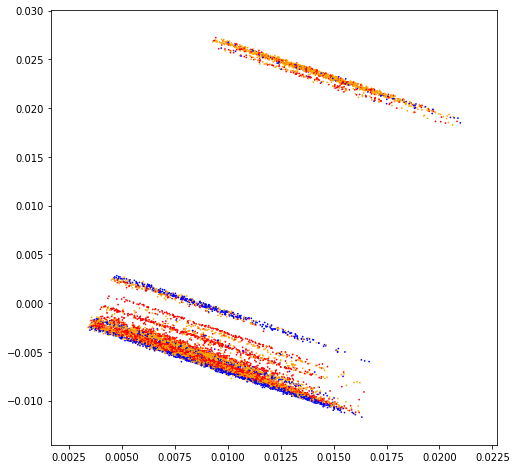

In [15]:
p=pca.fit(df_for_model.loc[:,df_for_model.columns!='ideologia'].T) 
color= ['red' if ideologia == 0 
        else 'orange' if ideologia == 1
        else 'blue' if ideologia == 2
        else 'red' for ideologia in list(df_for_model['ideologia'])]
plt.figure(figsize=(8,8))
plt.scatter(p.components_[0], p.components_[1],color=color,s=0.5)
p.components_



### Quitando categoricas###

In [16]:
#quitando las categoricas 
def drop_columna(data,columna,axis=1,inplace=True):
    data=data.drop(columna, axis=1, inplace=True)
    return data

In [17]:
variables_categoricas=["CAPITAL","CCAA","P0A","P14R","P22","P25","P26","P27","P28"]

In [18]:
encuesta2=encuesta.drop(columns=variables_categoricas)

In [19]:
encuesta2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9730
Data columns (total 21 columns):
P2002        9395 non-null int64
P3           9395 non-null int64
P2           9395 non-null int64
P1304        9395 non-null int64
P2004        9395 non-null int64
P803         9395 non-null int64
P1303        9395 non-null int64
P1301        9395 non-null int64
P23          9395 non-null int64
P802         9395 non-null int64
P2001        9395 non-null int64
P801         9395 non-null int64
P1           9395 non-null int64
P4           9395 non-null int64
P804         9395 non-null int64
P19          9395 non-null int64
TAMUNI       9395 non-null int64
P1302        9395 non-null int64
ESTUDIOS     9395 non-null int64
P2003        9395 non-null int64
ideologia    9395 non-null int64
dtypes: int64(21)
memory usage: 1.6 MB


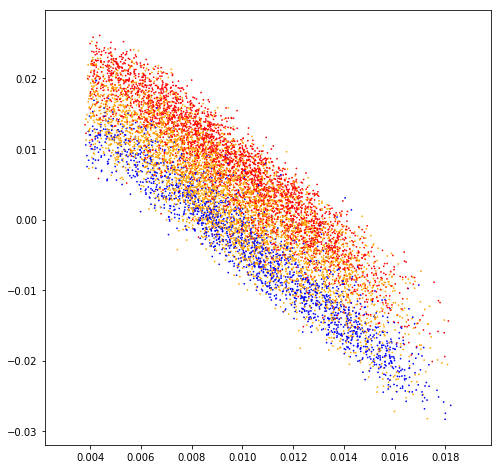

In [20]:
pca = PCA(n_components=2)
distribution_all=pca.fit(encuesta2.T) 
plt.figure(figsize=(8,8))
color= ['red' if ideologia == 0 
        else 'orange' if ideologia == 1
        else 'blue' if ideologia == 2
        else 'red' for ideologia in list(encuesta['ideologia'])]
plt.scatter(distribution_all.components_[0], distribution_all.components_[1],color=color,s=0.5)

In [21]:
from scipy import stats
k2, p_norm = stats.normaltest(encuesta2)
not_normal=[i for i in p_norm if i<0.05]

levene = []
for col in col_names:      

    l,p = (stats.levene(encuesta[col][encuesta['ideologia']==0], 
            encuesta[col][encuesta['ideologia']==1],
            encuesta[col][encuesta['ideologia']==2], 
            encuesta[col][encuesta['ideologia']==3],
            )) 
    levene.append((col, p))

not_homocedasticity=[i for i in p_norm if i<0.05]
print(len(not_homocedasticity),len(not_normal))

/home/vicente/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/vicente/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


20 20


In [22]:
col_names= encuesta2.columns
encuesta2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9730
Data columns (total 21 columns):
P2002        9395 non-null int64
P3           9395 non-null int64
P2           9395 non-null int64
P1304        9395 non-null int64
P2004        9395 non-null int64
P803         9395 non-null int64
P1303        9395 non-null int64
P1301        9395 non-null int64
P23          9395 non-null int64
P802         9395 non-null int64
P2001        9395 non-null int64
P801         9395 non-null int64
P1           9395 non-null int64
P4           9395 non-null int64
P804         9395 non-null int64
P19          9395 non-null int64
TAMUNI       9395 non-null int64
P1302        9395 non-null int64
ESTUDIOS     9395 non-null int64
P2003        9395 non-null int64
ideologia    9395 non-null int64
dtypes: int64(21)
memory usage: 1.6 MB


In [23]:
anova = []
for col in col_names:      

    a = (stats.f_oneway(encuesta2[col][encuesta2['ideologia']==0], 
            encuesta2[col][encuesta2['ideologia']==1],
            encuesta2[col][encuesta2['ideologia']==2], 
            )) 
    anova.append((col, a))
    
significant_columns=[i[0] for i in anova if i[1][1]<0.05]
len(significant_columns)



21

In [24]:
from sklearn.utils import shuffle
df_for_model=encuesta2[significant_columns]
df_for_model = shuffle(df_for_model) 


In [25]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 8175 to 2590
Data columns (total 21 columns):
P2002        9395 non-null int64
P3           9395 non-null int64
P2           9395 non-null int64
P1304        9395 non-null int64
P2004        9395 non-null int64
P803         9395 non-null int64
P1303        9395 non-null int64
P1301        9395 non-null int64
P23          9395 non-null int64
P802         9395 non-null int64
P2001        9395 non-null int64
P801         9395 non-null int64
P1           9395 non-null int64
P4           9395 non-null int64
P804         9395 non-null int64
P19          9395 non-null int64
TAMUNI       9395 non-null int64
P1302        9395 non-null int64
ESTUDIOS     9395 non-null int64
P2003        9395 non-null int64
ideologia    9395 non-null int64
dtypes: int64(21)
memory usage: 1.6 MB


array([[ 0.00707229,  0.01581501,  0.01122688, ...,  0.00617152,
         0.00595916,  0.01062467],
       [ 0.01285949, -0.0192355 , -0.00389684, ...,  0.00999659,
         0.01774318,  0.00025613]])

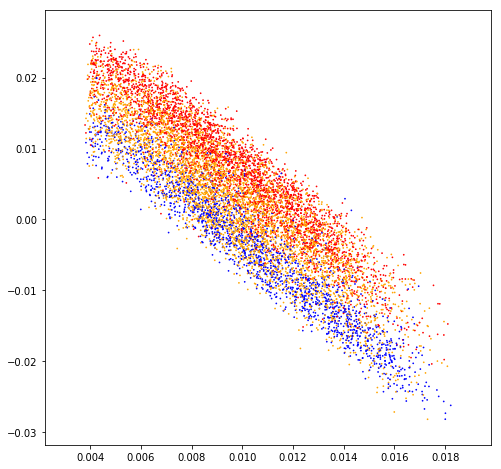

In [26]:
p=pca.fit(df_for_model.loc[:,df_for_model.columns!='ideologia'].T) 
color= ['red' if ideologia == 0 
        else 'orange' if ideologia == 1
        else 'blue' if ideologia == 2
        else 'red' for ideologia in list(df_for_model['ideologia'])]
plt.figure(figsize=(8,8))
plt.scatter(p.components_[0], p.components_[1],color=color,s=0.5)
p.components_


In [34]:
from sklearn.model_selection import train_test_split
X=df_for_model.loc[:,df_for_model.columns!='ideologia']
y=df_for_model['ideologia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

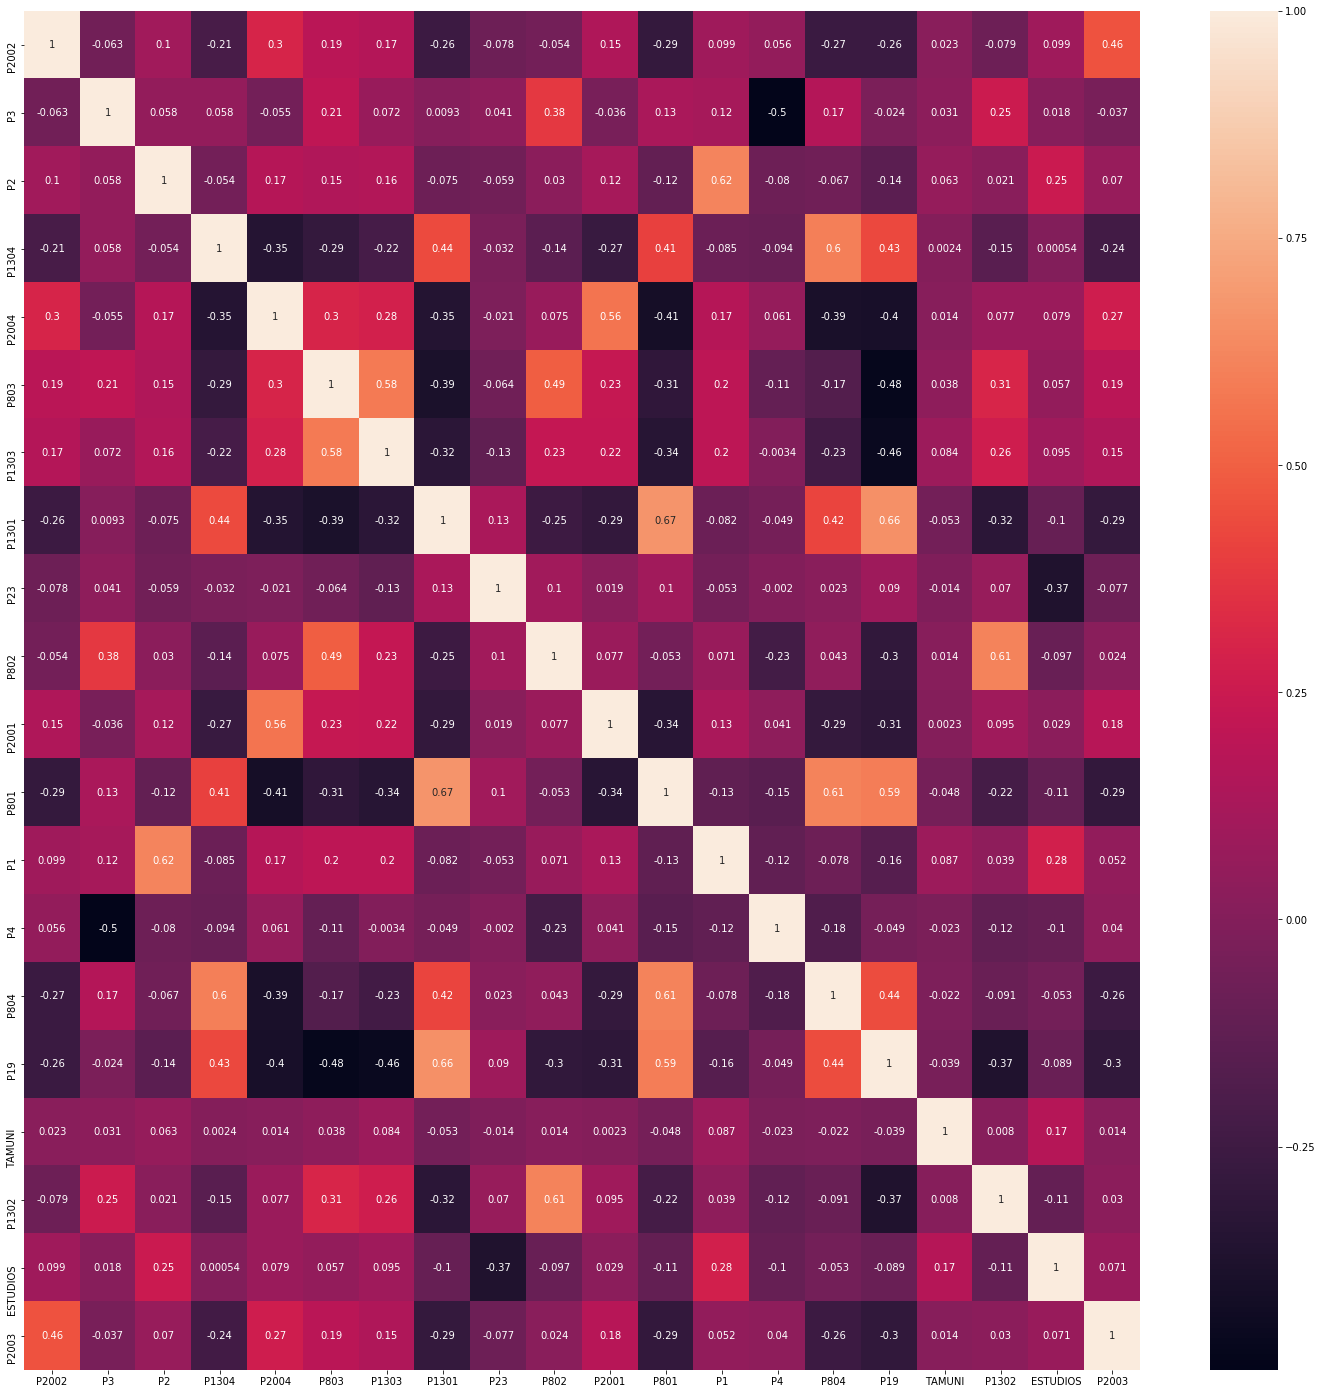

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = X.corr()
fig, ax = plt.subplots(figsize = (25,25))
ax = sns.heatmap(correlacion, annot=True)
ax

In [29]:
def variablescolinealidad(data):
    columns_to_drop=[]                  
    for c in data.columns:
        for i in range(len(data.corr())):
            if abs(data.corr()[c][i])>0.9 and abs(data.corr()[c][i])<1:columns_to_drop.append(c)
    columns_to_drop=list(set(columns_to_drop))   
    return len(columns_to_drop)

In [30]:
variablescolinealidad(X)

0

In [31]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier           
from sklearn.neighbors import KNeighborsClassifier            
from sklearn.ensemble import GradientBoostingClassifier       
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV 
from sklearn import tree




In [39]:
#indicando de que manera

lr = LogisticRegression(solver ='liblinear',max_iter=500)
#cls = svm.SVC(gamma='auto', probability=True)
neigh3 = KNeighborsClassifier(n_neighbors=3)
#neigh5 = KNeighborsClassifier(n_neighbors=5)
bosque=RandomForestClassifier(n_estimators=100, criterion='gini')
#tree = tree.DecisionTreeClassifier()

#entrenando
#cls.fit(X_train, y_train)
lr.fit(X_train, y_train)
neigh3.fit(X_train, y_train) 
#neigh5.fit(X_train, y_train) 
bosque.fit(X_train, y_train) 
#tree.fit(X_train, y_train)

/home/vicente/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
#y_predcls = cls.predict(X_test)
y_predlr = lr.predict(X_test)
y_pred_neigh3= neigh3.predict(X_test)
#y_pred_neigh5= neigh5.predict(X_test)
y_pred_bosque= bosque.predict(X_test)
#y_pred_tree= tree.predict(X_test)
print("Accuracy lineal:",metrics.accuracy_score(y_test, y_predcls))
#print("Accuracy logistics:",metrics.accuracy_score(y_test, y_predlr))
print("Accuracy neigh3:",metrics.accuracy_score(y_test, y_pred_neigh3))
#print("Accuracy neigh5:",metrics.accuracy_score(y_test, y_pred_neigh5))
print("Accuracy bosque:",metrics.accuracy_score(y_test, y_pred_bosque))
#print("Accuracy tree:",metrics.accuracy_score(y_test, y_pred_tree))



Accuracy lineal: 0.9717935071846727
Accuracy neigh3: 0.7908461947844598
Accuracy bosque: 1.0


In [47]:
from sklearn.metrics import confusion_matrix

#c_matrix_cls = confusion_matrix(y_test, y_pred)
c_matrix_lr = confusion_matrix(y_test, y_predlr)
c_matrix_neig3 = confusion_matrix(y_test, y_pred_neigh3)
#c_matrix_neig5 = confusion_matrix(y_test, y_pred_neigh5)
c_matrix_bosque = confusion_matrix(y_test, y_pred_bosque)
#c_matrix_tree = confusion_matrix(y_test, y_pred_tree)

#print("Lineal:",c_matrix_lr) 
#print("logistics",c_matrix_cls)
#print("neigh3",c_matrix_neig3)
#print("neigh5",c_matrix_neig5)
print("bosque","\n",c_matrix_bosque)
#print("tree",c_matrix_tree)

bosque 
 [[622   0   0]
 [  0 885   0]
 [  0   0 372]]


In [50]:
def plotMetricsCompare(X, y, metodo):
    metodo.fit(X_train, y_train)
    y_pred = metodo.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr)




In [51]:
plotMetricsCompare(X, y, bosque)

ValueError: multiclass format is not supported

In [68]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf


In [66]:
#ver peso de las variables 
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from regressors import stats
ols = linear_model.LinearRegression()
ols.fit(X, y)

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X, y))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X, y,)

coef_pval:
 [2.76667578e-13 3.97398159e-04 1.34792110e-05 4.70706280e-01
 1.76152039e-06 0.00000000e+00 7.72604373e-01 1.55431223e-15
 1.47256418e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
     Min      1Q  Median      3Q      Max
-26.3755 -1.9141  0.6455  2.8103  13.3968


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept  36.891960    4.914682   7.5065  0.000000
x1          -0.113139    0.031730  -3.5657  0.000397
x2           0.047052    0.010705   4.3955  0.000013
x3           0.040311    0.055843   0.7219  0.470706
x4         -17.366999    3.591187  -4.8360  0.000002
x5           3.850492    0.272966  14.1061  0.000000
x6           0.002784    0.009628   0.2891  0.772604
x7          -1.485374    0.180511  -8.2287  0.000000
x8           0.328311    0.061581   5.3314  0.000000
x9          -0.013756    0.001055 -13.0429  0.000000
x10         -0.990958    0.088987 -11.1360  0.000000
x11     

In [75]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
df_for_model.head()

,P2002,P3,P2,P1304,P2004,P803,P1303,P1301,P23,P802,...,P801,P1,P4,P804,P19,TAMUNI,P1302,ESTUDIOS,P2003,ideologia
8175,4,-4,-1,0,8,-3,5,0,34,-5,...,-5,-1,3,-5,2,2,0,6,2,0
5323,2,-5,-1,6,6,-5,0,9,82,-5,...,-2,-1,3,-3,10,7,1,3,1,2
758,5,-4,-2,6,5,-5,0,4,57,-3,...,-3,-3,4,-3,5,1,5,6,1,1
4457,4,-5,-1,0,10,-5,0,0,48,-5,...,-5,-3,4,-5,1,1,0,5,5,0
5076,4,-5,-1,0,8,-2,8,0,55,-3,...,-5,-2,5,-4,3,3,1,3,2,0


In [80]:
df_for_model.columns

Index(['P2002', 'P3', 'P2', 'P1304', 'P2004', 'P803', 'P1303', 'P1301', 'P23',
       'P802', 'P2001', 'P801', 'P1', 'P4', 'P804', 'P19', 'TAMUNI', 'P1302',
       'ESTUDIOS', 'P2003', 'ideologia'],
      dtype='object')

In [87]:
# Fit regression model (using the natural log of one of the regressors)
# results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
results = smf.ols('ideologia ~ P2002 + P3 + P2 + P1304 + P2004 + P803 + P1303 + P1301 + P23 + P802 + P2001 + P801 + P1 + P4 + P804 + P19 + TAMUNI + P1302 + ESTUDIOS + P2003', data=df_for_model).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ideologia   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2678.
Date:                Fri, 31 May 2019   Prob (F-statistic):               0.00
Time:                        17:47:52   Log-Likelihood:                -1139.8
No. Observations:                9395   AIC:                             2322.
Df Residuals:                    9374   BIC:                             2472.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5737      0.039    -14.648      0.0

In [ ]:
'P2002'+ 'P3'+ 'P2'+ 'P1304'+ 'P2004'+ 'P803'+ 'P1303'+ 'P1301'+ 'P23'+'P802'+ 'P2001'+ 'P801'+ 'P1'+ 'P4'+ 'P804'+ 'P19'+ 'TAMUNI'+ 'P1302'+'ESTUDIOS'+'P2003', data=df_for_model).fit()